# Load packages

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Import File

In [162]:
var_data = pd.read_csv('pd_input.vcf', sep='\t')
#var_data

In [3]:
# A sampple of the info field
var_data.loc[:, "INFO"][1]

'AB=0.16129;ABP=33.9012;AC=8;AF=0.4;AN=20;AO=10;CIGAR=1X1M1X;DP=120;DPB=120;DPRA=0.428571;EPP=24.725;EPPR=3.0103;GTI=4;LEN=1;MEANALT=1;MQM=53.8;MQMR=52.0727;NS=10;NUMALT=1;ODDS=1.50578;PAIRED=0;PAIREDR=0;PAO=0;PQA=0;PQR=0;PRO=0;QA=355;QR=3440;RO=110;RPL=0;RPP=24.725;RPPR=3.0103;RPR=10;RUN=1;SAF=10;SAP=24.725;SAR=0;SRF=110;SRP=241.872;SRR=0;TYPE=snp;ANN=A|upstream_gene_variant|MODIFIER|YAL067W-A|YAL067W-A|transcript|YAL067W-A|protein_coding||c.-1510G>A|||||1510|,A|downstream_gene_variant|MODIFIER|YAL069W|YAL069W|transcript|YAL069W|protein_coding||c.*321G>A|||||321|,A|downstream_gene_variant|MODIFIER|YAL068W-A|YAL068W-A|transcript|YAL068W-A|protein_coding||c.*178G>A|||||178|,A|downstream_gene_variant|MODIFIER|PAU8|YAL068C|transcript|YAL068C|protein_coding||c.*837C>T|||||837|,A|intergenic_region|MODIFIER|YAL068W-A-PAU8|YAL068W-A-YAL068C|intergenic_region|YAL068W-A-YAL068C|||n.970G>A||||||'

## Read Depth Histogram

In [131]:
#cols_to_plot = ['A01_09','A01_11','A01_23', 'A01_24','A01_27','A01_31', 'A01_35', 'A01_39', 'A01_62','A01_63']
#print(var_data.loc[:, 'A01_09'][1])
#var_data.loc[:, 'A01_09'][1].split(":")[2]

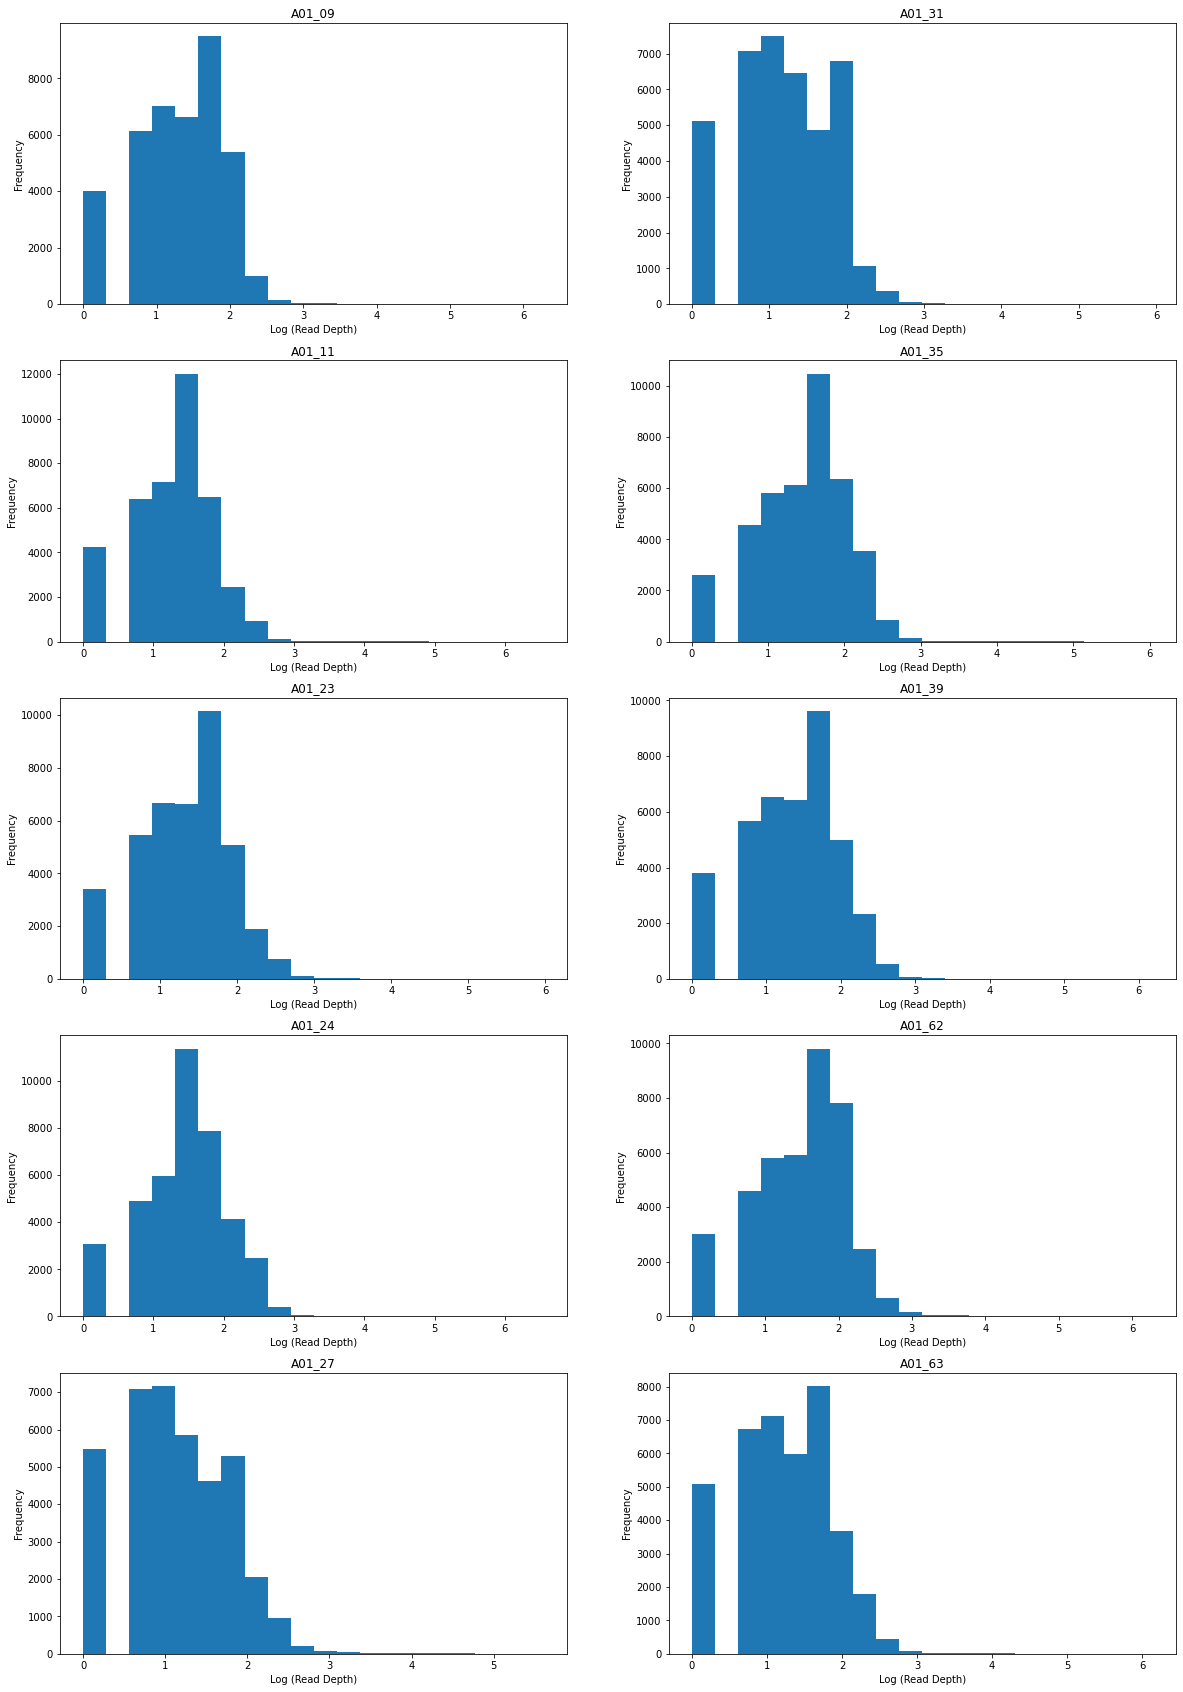

In [132]:
# Read depth is coded as DP; is the third field
fig, ax = plt.subplots(figsize = (20,30), nrows=5, ncols = 2)

cols_to_plot = ['A01_09','A01_11','A01_23', 'A01_24','A01_27','A01_31', 'A01_35', 'A01_39', 'A01_62','A01_63']

c=0
r=0

for i in range(0,len(cols_to_plot)):
    
    hists = []
    for j in var_data.loc[:, cols_to_plot[i]]:
        if j.split(":")[2] != ".":
            hists.append(math.log(int(j.split(":")[2])))
    
    # Generate histograms
    ax[c,r].hist( hists, bins = 20)
    ax[c,r].set_title(cols_to_plot[i])
    ax[c,r].set_xlabel("Log (Read Depth)")
    ax[c,r].set_ylabel("Frequency")
    
    
    if i != 4:
        c+=1
    else:   
        c=0
        r+=1
plt.show()

## Quality Score Histogram

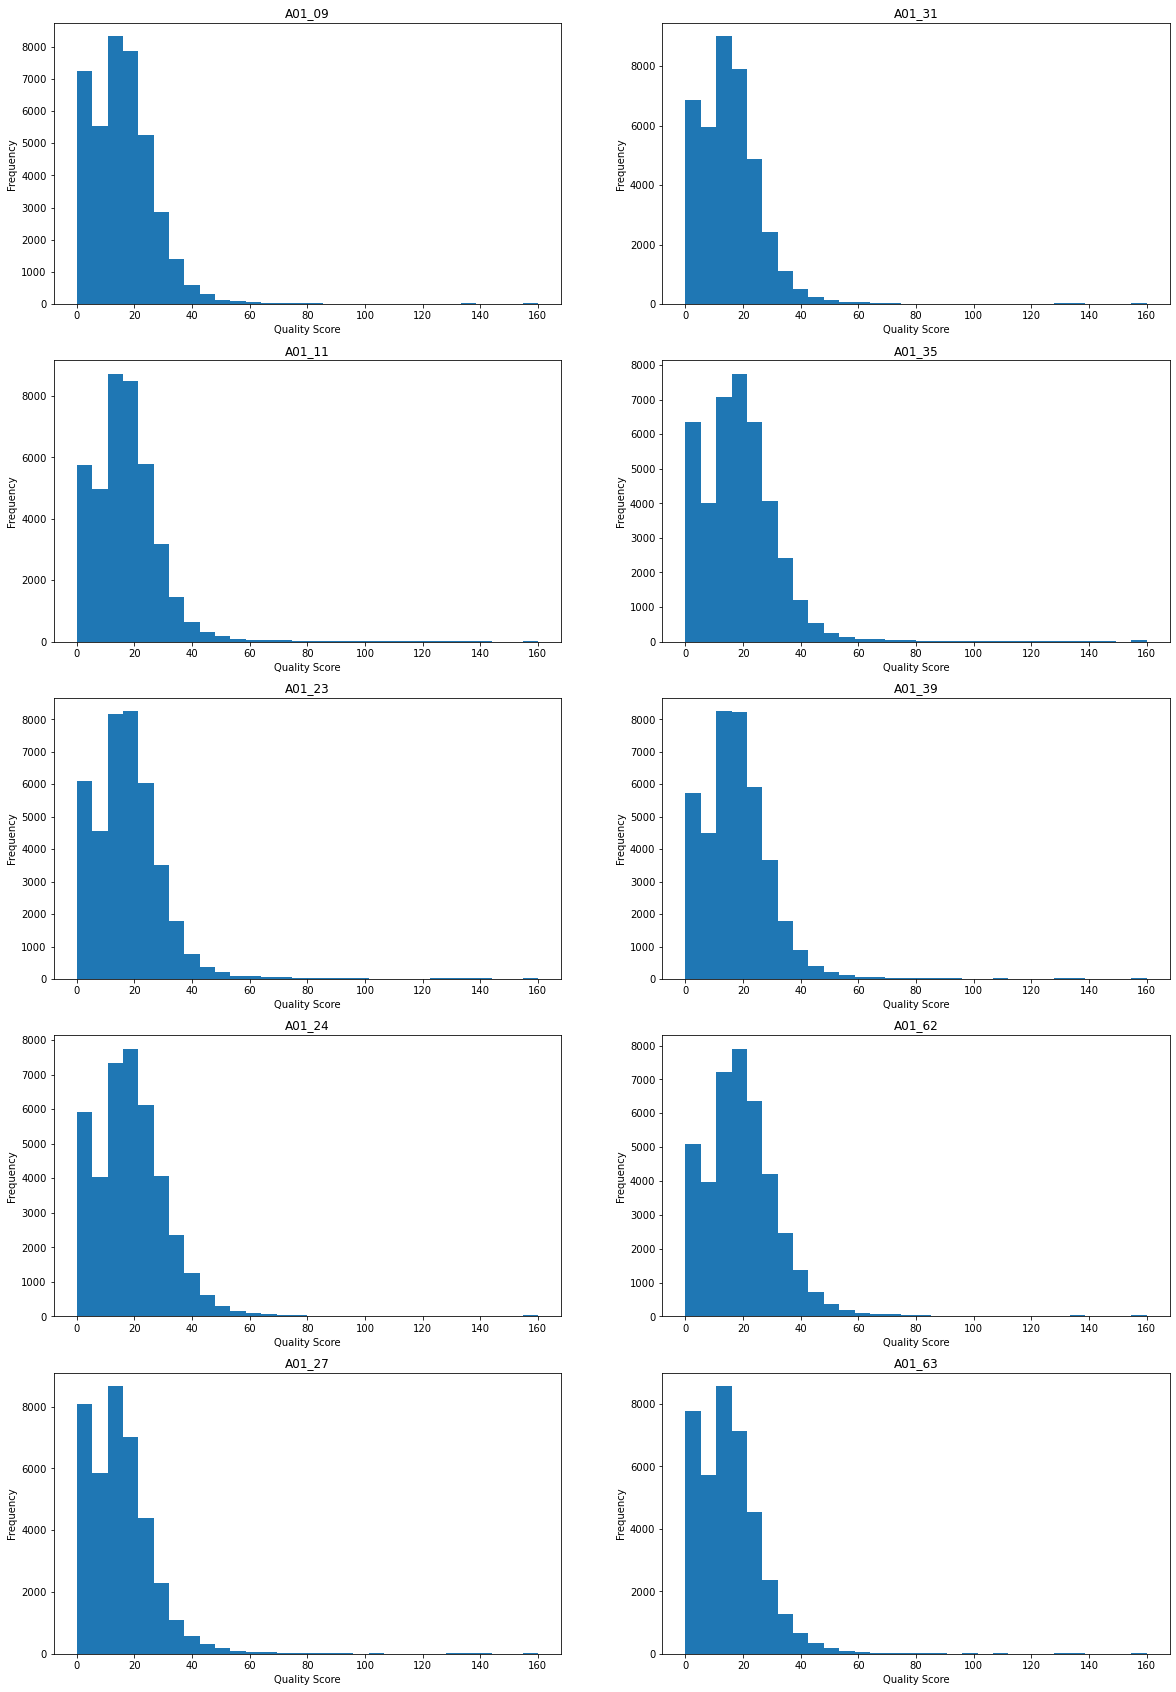

In [108]:
# Quality is encoded in the GQ field, which is the second field
fig, ax = plt.subplots(figsize = (20,30), nrows=5, ncols = 2)

cols_to_plot = ['A01_09','A01_11','A01_23', 'A01_24','A01_27','A01_31', 'A01_35', 'A01_39', 'A01_62','A01_63']

c=0
r=0

for i in range(0,len(cols_to_plot)):
    
   
    hists = []
    for j in var_data.loc[:, cols_to_plot[i]]:
        if j.split(":")[1] != ".":
            hists.append(float(j.split(":")[1]))
    
    # Generate histograms
    ax[c,r].hist( hists, bins = 30)
    ax[c,r].set_title(cols_to_plot[i])
    ax[c,r].set_xlabel("Quality Score")
    ax[c,r].set_ylabel("Frequency")
    
    
    if i != 4:
        c+=1
    else:   
        c=0
        r+=1
plt.show()

## Alelle Frequency Spectrum

Allele freq is ecoded in AF in the INFO field

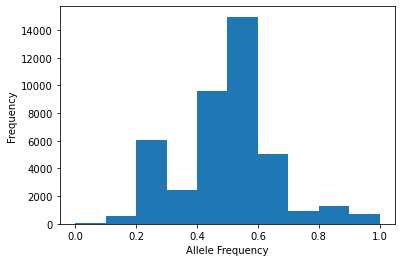

In [144]:
#var_data.loc[:, "INFO"][1].split(';')[0].split('=')[1]
#var_data.loc[:, "INFO"][1].split(';')[3].split('=')[1]

hists = []
for j in range(len(var_data.loc[:, "INFO"])):
       hists.append(float(var_data.loc[:, "INFO"][j].split(';')[3].split('=')[1].split(',')[0]))
hists    
fig, ax = plt.subplots()
ax.hist( hists)
ax.set_xlabel("Allele Frequency")
ax.set_ylabel("Frequency")
plt.show()


## Predicted Effects

In [159]:
#var_data.loc[:, "INFO"][1].split("|")

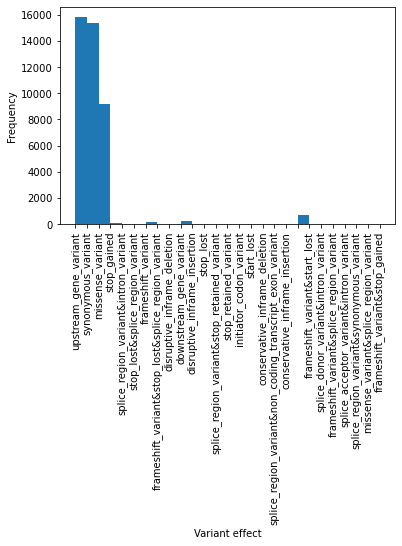

In [158]:
hists = []
for j in range(len(var_data.loc[:, "INFO"])):
       hists.append(var_data.loc[:, "INFO"][j].split("|")[1])
hists    
fig, ax = plt.subplots()
ax.hist( hists, bins = 26)
ax.set_xlabel("Variant effect")
ax.set_ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

And here is the plot for the size of these effects

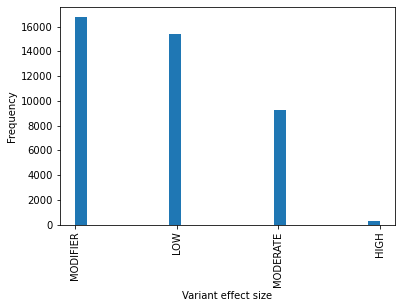

In [161]:
hists = []
for j in range(len(var_data.loc[:, "INFO"])):
       hists.append(var_data.loc[:, "INFO"][j].split("|")[2])
hists    
fig, ax = plt.subplots()
ax.hist( hists, bins = 26)
ax.set_xlabel("Variant effect size")
ax.set_ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()